# Importance Sampling

Let $X \sim f$ with $f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}|\sin x|$, use importance sampling to compute its first three moments $\mathbb{E}[X]$, $\mathbb{E}[X^2]$, $\mathbb{E}[X^3]$ of $X$.

We use as an importance distribution $\mathcal{N}(0, 1)$ with p.d.f $g(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$, and get:

$$
\mathbb{E}_f[h(X)] =  \int h(x) \cdot f(x)\ \text{dx} = \int h(x) \cdot \frac{f(x)}{g(x)} g(x)\ \text{dx} = \mathbb{E}_g[w(X) \cdot h(X)]
$$

Since it is easy to sample from $\mathcal{N}(0, 1)$, having $X_1, \ldots, X_n \sim \mathcal{N}(0, 1)$ we get,

$$
\frac{1}{n}\sum_{i=1}^n w(X_i) \cdot h(X_i) \xrightarrow[\text{a.s}]{n \rightarrow \infty} \mathbb{E}_g[w(X) \cdot h(X)]
$$

thus giving,

$$
    \frac{1}{n}\sum_{i=1}^n w(X_i) \cdot h(X_i) \xrightarrow[\text{a.s}]{n \rightarrow \infty} \mathbb{E}_f[h(X)].
$$

We can then use the following estimator for $\mathbb{E}_f[h(X)]$,

$$
\hat{\mu}_n := \frac{1}{n}\sum_{i=1}^n w(X_i) \cdot h(X_i)
$$



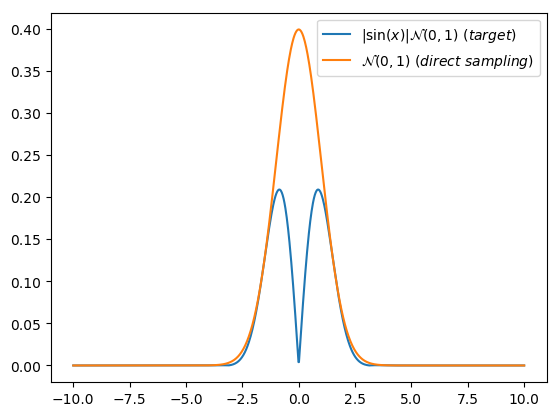

PyObject <matplotlib.legend.Legend object at 0x7f8acf057110>

In [99]:
using PyPlot
using Interact

# we first plot the two densities of interest

x = linspace(-10,10,1000)
dis = abs.(sin.(x)) .* exp.(-x.^2/2)/sqrt(2*pi)
imp = exp.(-x.^2/2)/sqrt(2*pi)

plot(x,dis,label=L"|\sin(x)|\mathcal{N}(0,1)\ (target)")
plot(x,imp, label=L"\mathcal{N}(0,1)\ (direct\ sampling)")

legend()

Interact.Options{:ToggleButtons,Any}(19: "input-6" = #683 Any , "Q", #683, "x", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("x"=>#683,"x^2"=>#684,"x^3"=>#686), Dict{Any,Any}(Pair{Any,Any}(#684, "x^2"),Pair{Any,Any}(#683, "x"),Pair{Any,Any}(#686, "x^3"))), Any[], Any[], true, "horizontal")

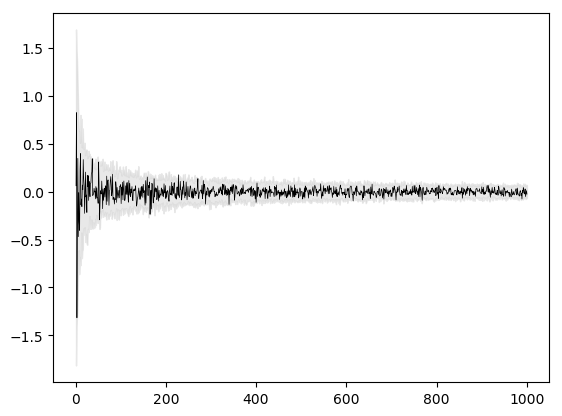

In [109]:
# we now perform importance sampling to estimate expectations of x, x^2, x^3
# with n=1...1000

over(f) = (l,r) -> [f.(l[i],r[i]) for i =1:length(l)]
d(f) = x -> f.(x)

function estimate(q)
    x = randn.(n)
    w = d(abs).(d(sin).(x))
    h = d(q).(x)
    sum.(over(*)(w, h)) ./ n
end

n = collect(1:1000)

fig = figure()
@manipulate for Q = ["x" => (x->x), "x^2" => (x->x.^2), "x^3"=> (x->x.^3)]
    μ = estimate(Q)
    μ_lo = μ
    μ_hi = μ
    
    for j=1:100
        μ = estimate(Q)
        μ_lo = over(min)(μ_lo, μ)
        μ_hi = over(max)(μ_hi, μ)
    end
    
    withfig(fig) do
        plot(n, μ, linewidth=.5,color="black")
        fill_between(n, μ_lo, μ_hi, alpha=0.5, color="lightgrey")
    end
end